In [3]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

root_dir = "../"
sys.path.append(root_dir)
import configs
import datasets
from ibydmt.utils.config import get_config
from ibydmt.utils.viz import viz_importance_agreement

config_name, test_type, concept_type = "imagenette", "local_cond", "image"
cardinality = 4
results_kw = {"testing.kernel_scale": 0.5, "testing.tau_max": 200}

config = get_config(config_name)

sns.set_style()
sns.set_context("paper")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\IBYDMT_proj\\.venv\\Lib\\site-packages\\data\\imagenette2\\train'

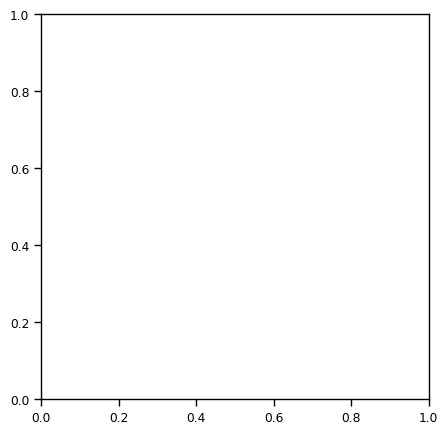

In [5]:
figure_dir = os.path.join(
    root_dir, "figures", config.name.lower(), test_type, "importance_agreement"
)
os.makedirs(figure_dir, exist_ok=True)


def viz_mean_agreement(importance_agreement_results):
    off_diagonal = ~np.eye(importance_agreement_results.shape[1], dtype=bool)
    rank_mu = importance_agreement_results[:, off_diagonal].mean()
    rank_std = importance_agreement_results[:, off_diagonal].std()
    print(f"Average: {rank_mu:.2f} pm {rank_std:.2f}")


_, ax = plt.subplots(figsize=(5, 5))
_, importance_agreement_results = viz_importance_agreement(
    config,
    test_type,
    concept_type,
    cardinality=cardinality,
    results_kw=results_kw,
    ax=ax,
)
viz_mean_agreement(importance_agreement_results)

figure_name = f"{results_kw['testing.tau_max']}_{concept_type}"
if cardinality is not None:
    figure_name += f"_{cardinality}"
plt.savefig(os.path.join(figure_dir, f"{figure_name}.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(figure_dir, f"{figure_name}.jpg"), bbox_inches="tight")
plt.show()
plt.close()